# Anomaly Detection Project Scratchpad

### James Allen

Project Scenario

Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

Other info:

* To turn in your project, email datascience@codeup.com with the subject line "Anomaly Detection Project"

• To get 100 on this project you only need to answer 5 out of the 7 questions (along with the other deliverables listed below i.e. slide, your notebook, etc).

• Submit a link to a final notebook on GitHub that asks and answers questions - document the work you do to justify findings

• Compose an email with the answers to the questions/your findings, and in the email, include the link to your notebook in GitHub and attach your slide.

• You will not present this, so be sure that the details you need your leader to convey/understand are clearly communicated in the email.

• Your slide should be like an executive summary and be in form to present.

• Continue to use best practices of acquire.py, prepare.py, etc.

• Since there is no modeling to be done for this project, there is no need to split the data into train/validate/test

• The cohort schedule is in the SQL database, and alumni.codeup.com has info as well.


In [3]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn import metrics
from env import user, host, password
from acquire import get_connection, curriculum_data, get_curriculum_data

In [4]:
# getting the curriculum data from the codeup database
df = get_curriculum_data()

In [5]:
df.head() # check_yo_head

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1


In [17]:
df = df.drop(columns= 'deleted_at')

In [21]:
df.isna().sum()

date             0
time             0
path             0
user_id          0
cohort_id     1334
ip               0
id               0
name             0
slack            0
start_date       0
end_date         0
created_at       0
updated_at       0
program_id       0
dtype: int64

In [18]:
df.groupby('path').head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-14 14:54:22,2021-04-14,14:54:22,storytelling/refine-present,11,28.0,173.174.222.66,11,Ike,#ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2021-04-14 15:05:12,2021-04-14,15:05:12,individual-project/individual-project,11,28.0,173.174.222.66,11,Ike,#ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2021-04-15 16:28:50,2021-04-15,16:28:50,appendix/professional-development/post-intervi...,1,28.0,70.121.199.82,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2021-04-18 19:39:50,2021-04-18,19:39:50,python/pandas-overview,1,28.0,70.121.199.82,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1


In [19]:
df.path.value_counts()

/                                                                 5056
index.html                                                        1520
javascript-i                                                      1486
spring                                                            1401
java-iii                                                          1237
                                                                  ... 
content/appendix/postwork/sales-tax.html                             1
content/mysql/aliases-and-functions/gitbook/images/favicon.ico       1
6.01.01_AcquireSQL                                                   1
team-setups                                                          1
advanced-topics/html-templates                                       1
Name: path, Length: 1442, dtype: int64

In [23]:
#df = df.set_index(pd.to_datetime(df.date + ' ' + df.time))

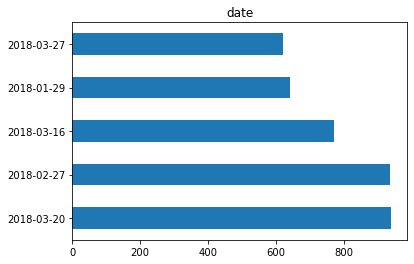

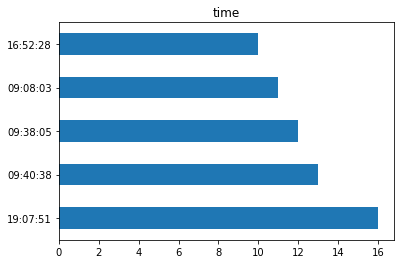

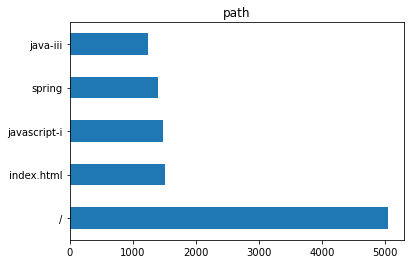

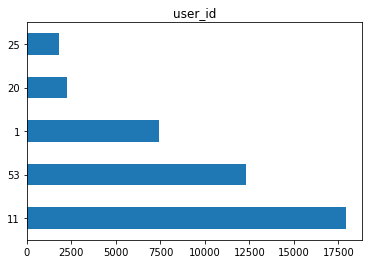

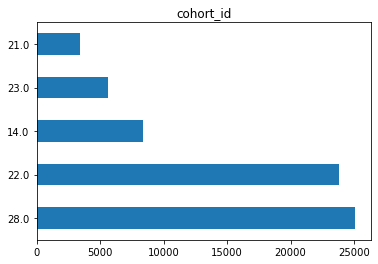

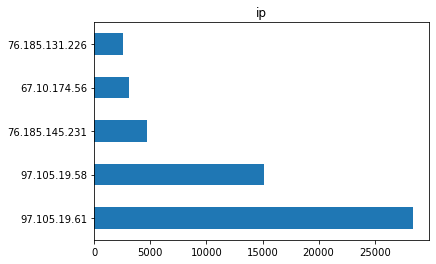

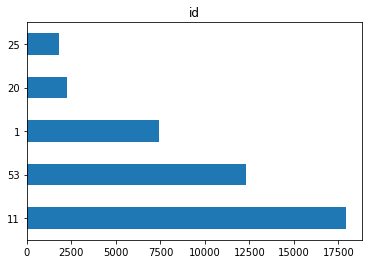

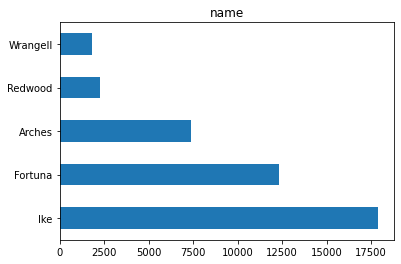

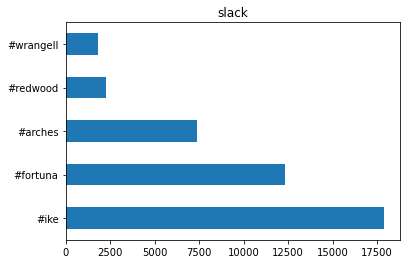

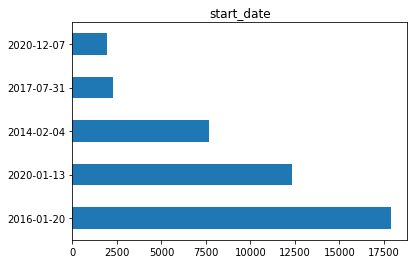

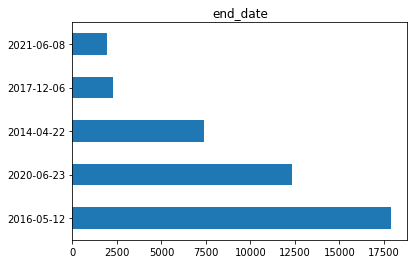

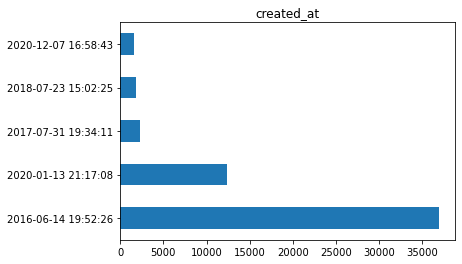

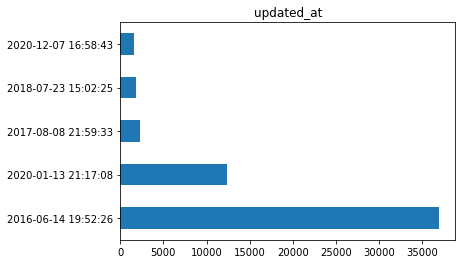

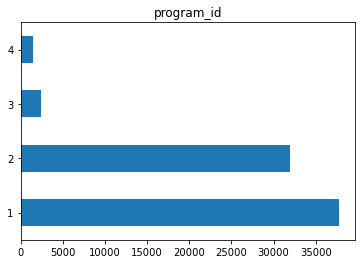

In [27]:
for col in df.columns:
    plt.figure()
    df[col].value_counts().sort_values(ascending = False).head(5).plot.barh(title = col)

This is the secret sauce

1. groupby + resample + .size() gives us counts over time for each unique value of the discrete variable

2. .unstack(0) converts the index of the discrete variable to columns

We end up with a dataframe where the rows are our chosen time period, columns are unique values of the discrete var, and the values are the number of times that combination of discrete var + time period shows up (i.e. # of requests per cohort per week).

In [ ]:
df = df.set_index(pd.to_datetime(df.date + ' ' + df.time))

In [11]:
cohort_requests = df.groupby('cohort_id').resample('W').size().unstack(0)
cohort_requests.head()

cohort_id,1.0,8.0,13.0,14.0,16.0,18.0,21.0,22.0,23.0,28.0
2018-01-28,19.0,8.0,52.0,7.0,2.0,3.0,196.0,457.0,NaN,NaN
2018-02-04,58.0,36.0,37.0,162.0,13.0,15.0,795.0,1989.0,NaN,NaN
2018-02-11,29.0,36.0,6.0,168.0,22.0,14.0,435.0,1489.0,NaN,NaN
2018-02-18,50.0,2.0,19.0,110.0,16.0,10.0,173.0,1544.0,NaN,NaN
2018-02-25,59.0,85.0,1.0,175.0,6.0,22.0,184.0,1828.0,NaN,NaN


<AxesSubplot:>

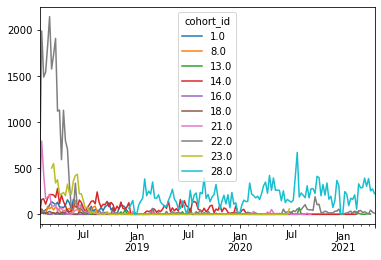

In [12]:
cohort_requests.plot()

In [13]:
K = 2
N = 5
s = cohort_requests.iloc[:, 0]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
2018-01-28,19.0,NaN,NaN,NaN
2018-02-04,58.0,NaN,NaN,NaN
2018-02-11,29.0,NaN,NaN,NaN
2018-02-18,50.0,NaN,NaN,NaN
2018-02-25,59.0,43.0,79.083237,6.916763


Text(0, 0.5, '# of requests')

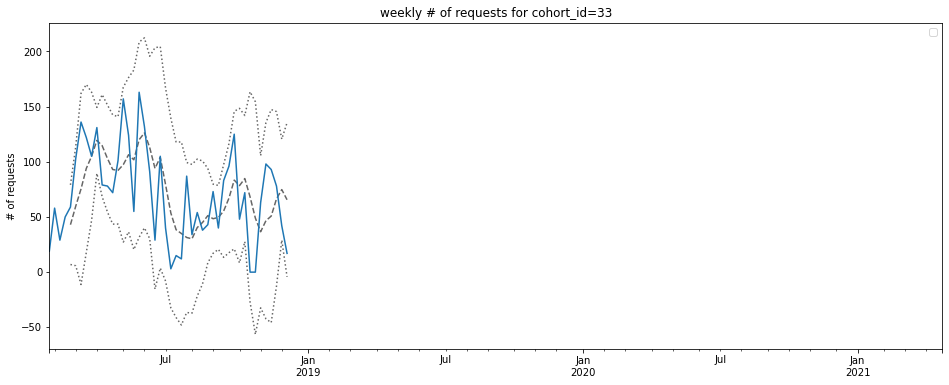

In [14]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort_id=33')
plt.ylabel('# of requests')